In [22]:
import importlib
import copy

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import plot_utils
importlib.reload(plot_utils)
import plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [24]:
ski_dataset = MyPyTable().load_from_file("./input_data/ski-resorts.csv")

# exploring different attribute combinations
ski_X = ski_dataset.get_columns(["elevation_top_m", "elevation_difference_m", "total_slope_length_km", "number_of_lifts", "number_of_slopes", "annual_snowfall_cm"])
ski_y = ski_dataset.get_column("rating")

matrix_headers = ["rating", "very high", "high", "average", "low", "very low", "Total", "Recognition (%)"]

discretizer = myutils.discretize_ranking

X_copy = copy.deepcopy(ski_X)
y_copy = copy.deepcopy(ski_y)
for i, row in enumerate(X_copy):
    row[0] = myutils.discretize_elevation(row[0])
    row[1] = myutils.discretize_elevation_difference(row[1])
    row[2] = myutils.discretize_slope_length(row[2])
    row[3] = myutils.discretize_num_lifts(row[3])
    row[4] = myutils.discretize_num_slopes(row[4])
    row[5] = myutils.discretize_snowfall(row[5])
    y_copy[i] = discretizer(y_copy[i])

# Dummy Classification

In [32]:
dummy_clf = MyDummyClassifier()
dummy_actual, dummy_pred, dummy_accuracy, dummy_error = myevaluation.display_cross_val(X_copy, y_copy, dummy_clf, matrix_headers)

Accuracy: 0.19792935444579782, Error Rate: 0.8020706455542022

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high            0     198        264    195           0      657                  0
high                 0     195        264    198           0      657                 29
average              0     198        260    198           0      656                 39
low                  0     198        264    195           0      657                 29
very low             0     195        264    198           0      657                  0


## kNN Classification

In [31]:
knn_clf = MyKNeighborsClassifier(categorical=True)
knn_actual, knn_pred, knn_actual, knn_error = myevaluation.display_cross_val(X_copy, y_copy, knn_clf, matrix_headers)

Accuracy: 0.43270401948842874, Error Rate: 0.5672959805115713

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          581      68          8      0           0      657                 88
high               269     275         92     19           2      657                 41
average             71     239        263     74           9      656                 40
low                  6     113        286    226          26      657                 34
very low             1      43        120    417          76      657                 11


# Naive Bayes Classification

In [30]:
nb_clf = MyNaiveBayesClassifier()
nb_actual, nb_pred, nb_accuracy, nb_error = myevaluation.display_cross_val(X_copy, y_copy, nb_clf, matrix_headers)

Accuracy: 0.6059683313032886, Error Rate: 0.39403166869671136

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          538      98         17      0           4      657                 81
high               145     319        142     35          16      657                 48
average             15     176        292    159          14      656                 44
low                  1       9        159    317         171      657                 48
very low             1       0         10    122         524      657                 79


# Decision Tree Classification

In [26]:
tree_clf = MyDecisionTreeClassifier()
tree_actual, tree_pred, tree_accuracy, tree_error = myevaluation.display_cross_val(X_copy, y_copy, tree_clf, matrix_headers)

Accuracy: 0.6001827040194885, Error Rate: 0.3998172959805115

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          535     104         13      5           0      657                 81
high               110     360        127     48          12      657                 54
average             12     179        237    194          34      656                 36
low                  2      23         99    371         162      657                 56
very low             1       0          4    184         468      657                 71


# Random Forest Classification

In [28]:
forest_clf = MyRandomForestClassifier(50, 3, 4)
forest_actual, forest_pred, forest_accuracy, forest_error = myevaluation.display_cross_val(X_copy, y_copy, forest_clf, matrix_headers)

Accuracy: 0.5956151035322778, Error Rate: 0.40438489646772224

rating       very high    high    average    low    very low    Total    Recognition (%)
---------  -----------  ------  ---------  -----  ----------  -------  -----------------
very high          520     121         11      5           0      657                 79
high               110     357        131     47          12      657                 54
average              7     177        254    185          33      656                 38
low                  1      16        124    338         178      657                 51
very low             0       0         10    160         487      657                 74


## Data Visualizations

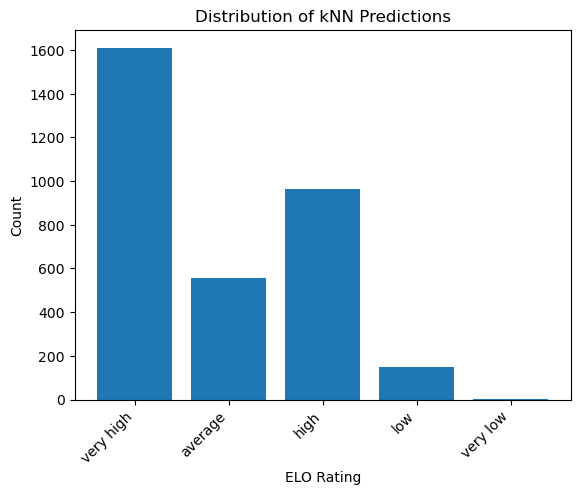

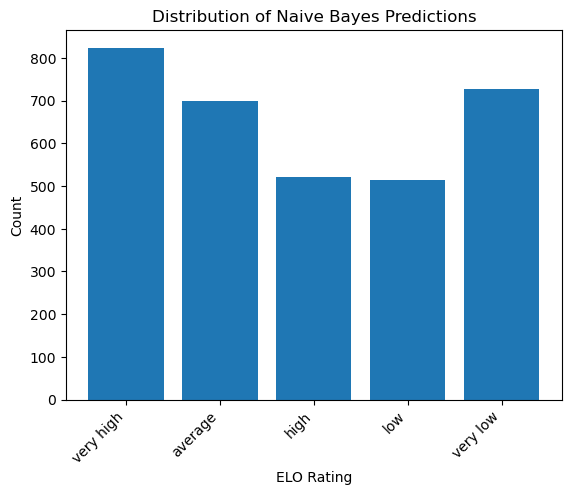

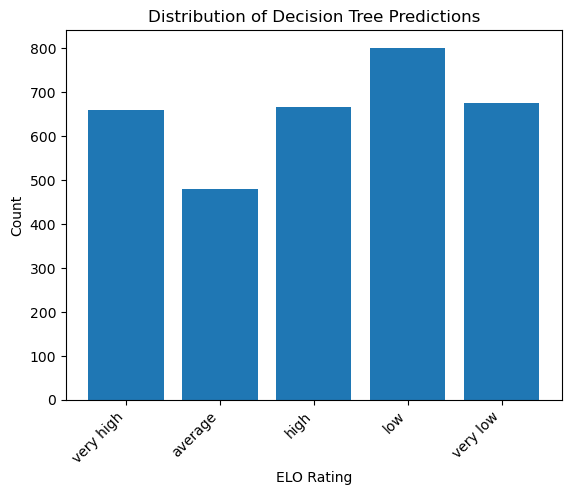

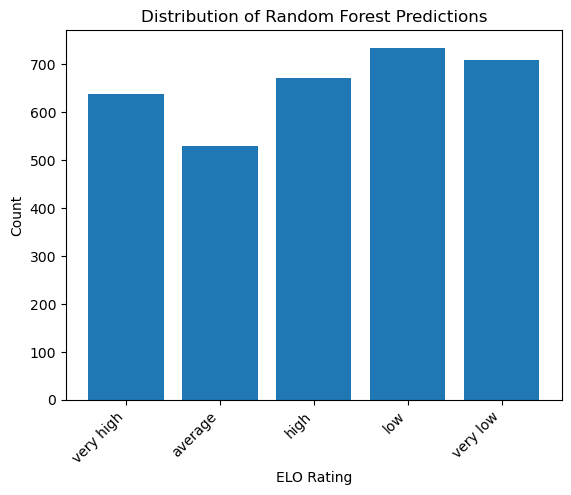

In [ ]:
myevaluation.display_distributions(knn_pred, "kNN")
myevaluation.display_distributions(nb_pred, "Naive Bayes")
myevaluation.display_distributions(tree_pred, "Decision Tree")
myevaluation.display_distributions(forest_pred, "Random Forest")